In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
data = pd.read_csv("diabetes.csv")
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']

X = data[feature_cols]
y = data['Outcome']    

In [4]:
data = pd.read_csv("diabetes.csv")
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction',]
X = data[feature_cols] 
y = data['Outcome']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [6]:
logic = LogisticRegression(random_state=16, max_iter=1000)  # max_iter to avoid convergence issues
logic.fit(X_train, y_train)
y_pred = logic.predict(X_test)
print(y_pred)

[1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0
 1 1 0 0 0 1 1]


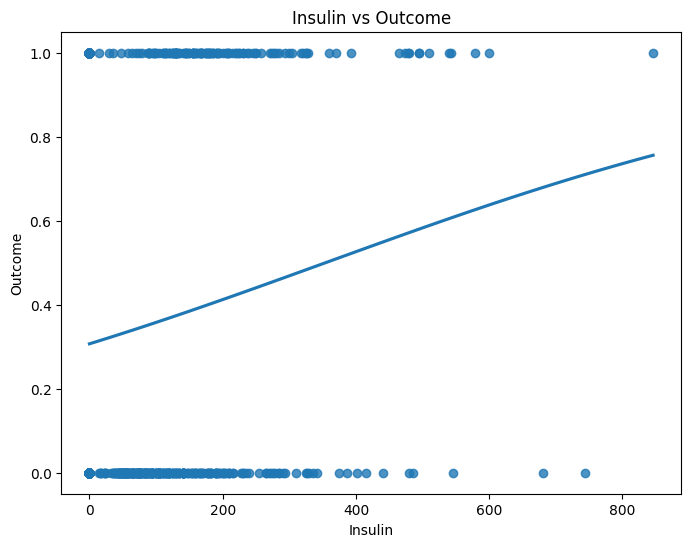

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.regplot(x='Insulin', y='Outcome', data=data, logistic=True, ci=None)
plt.title('Insulin vs Outcome')
plt.xlabel('Insulin')
plt.ylabel('Outcome')
plt.show()

<Axes: xlabel='Insulin', ylabel='Outcome'>

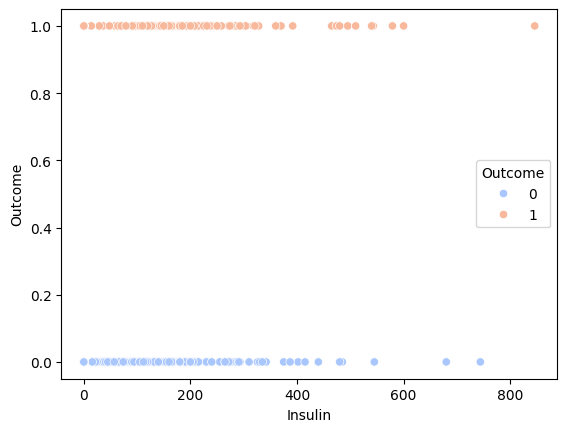

In [8]:
import seaborn as sns
import matplotlib as plt
sns.scatterplot(x='Insulin', y='Outcome', data=data, hue='Outcome', palette='coolwarm')

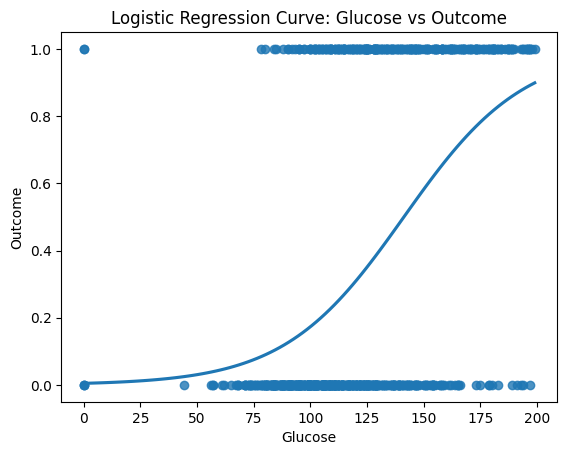

In [9]:
import matplotlib.pyplot as plt
sns.regplot(x='Glucose', y='Outcome', data=data, logistic=True, ci=None)
plt.title('Logistic Regression Curve: Glucose vs Outcome')
plt.show()

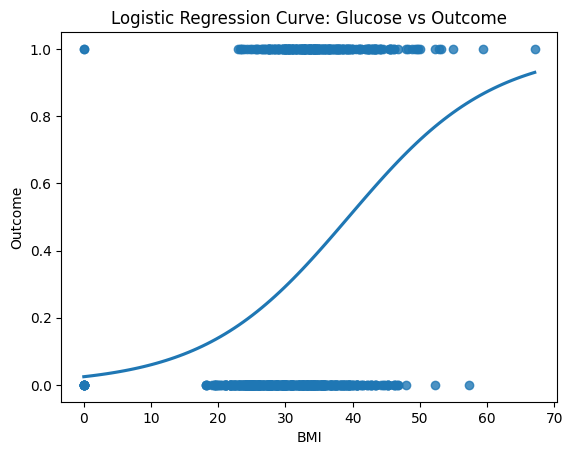

In [10]:
import matplotlib.pyplot as plt
sns.regplot(x='BMI', y='Outcome', data=data, logistic=True, ci=None)
plt.title('Logistic Regression Curve: Glucose vs Outcome')
plt.show()

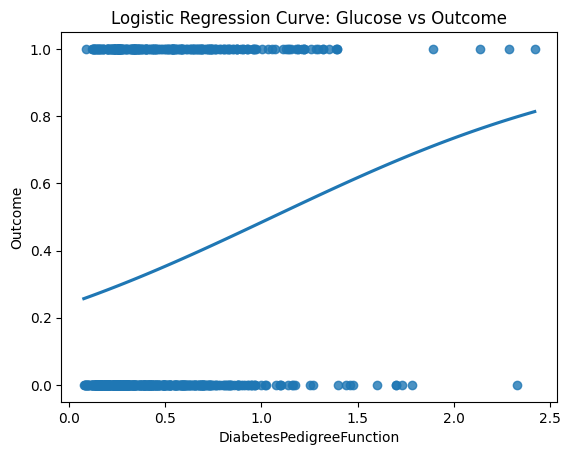

In [11]:
import matplotlib.pyplot as plt
sns.regplot(x='DiabetesPedigreeFunction', y='Outcome', data=data, logistic=True, ci=None)
plt.title('Logistic Regression Curve: Glucose vs Outcome')
plt.show()

In [12]:
from sklearn import metrics 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]])

In [14]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
answer=classification_report(y_test, y_pred, target_names=target_names)
print(answer)

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



Text(0.5, 427.9555555555555, 'Predicted label')

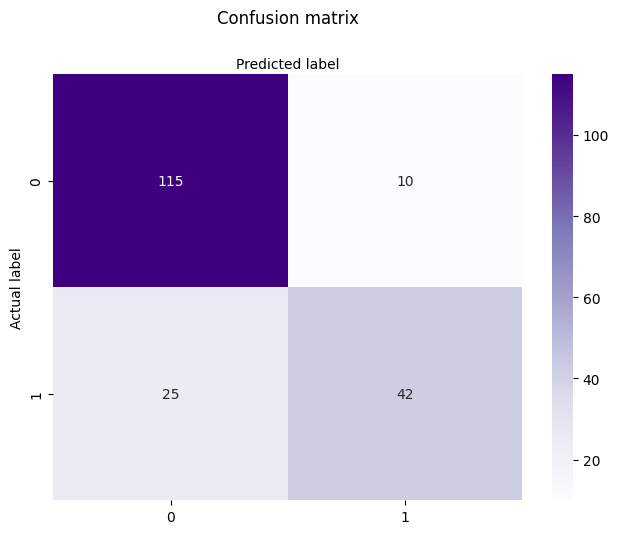

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Purples" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
